In [22]:
import matplotlib.pyplot as plt
import rasterio
import geopandas as gpd
import pandas as pd
import pyarrow.parquet as pq

## Input data

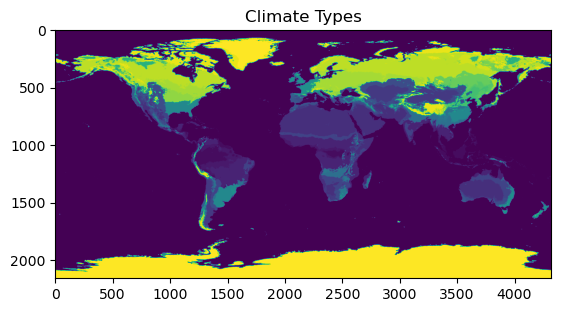

In [23]:
# Open the raster file
file_path = 'data/input/climate_types/Beck_KG_V1_present_0p083.tif'
raster = rasterio.open(file_path)

# Read the raster data
data = raster.read(1)

# Plot the map
plt.imshow(data, cmap='viridis')
plt.title('Climate Types')
plt.show()


## Output data: zcta

In [24]:
# Read the aggregated climate types file
pq_file = 'data/output/climate_types_raster2polygon/climate_types_zcta_2015.parquet'
climate_types_df = pq.read_table(pq_file).to_pandas()
climate_types_df.head()

,zcta,climate_type_short,climate_type_long,Af,Am,Aw,BWh,BWk,BSh,BSk,...,Dwa,Dwb,Dwc,Dwd,Dfa,Dfb,Dfc,Dfd,ET,EF
0,36907,Cfa,"Temperate, no dry season, hot summer",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,85922,BSk,"Arid, steppe, cold",0.0,0.0,0.0,0.0,0.0,0.0,0.723127,...,0.0,0.0,0.0,0.0,0.0,0.009121,0.0,0.0,0.0,0.0
2,84536,BWk,"Arid, desert, cold",0.0,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,94929,Csb,"Temperate, dry summer, warm summer",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,96086,Csb,"Temperate, dry summer, warm summer",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [25]:
type(climate_types_df.zcta[0])

str

In [26]:
# Read the shapefile
shapefile_path = 'data/input/shapefiles/shapefile_zcta_2015/shapefile.shp'
shapefile = gpd.read_file(shapefile_path)
shapefile.rename(columns={'ZCTA5CE10': 'zcta'}, inplace=True)

type(shapefile.zcta[0])

str

In [27]:
# Merge the shapefile and df based on a common column
merged_data = shapefile.merge(climate_types_df, on='zcta')

<Axes: >

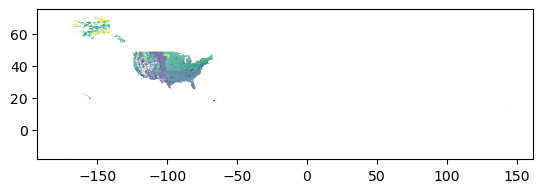

In [28]:
# Plot the merged data
merged_data.plot(column='climate_type_short', cmap='viridis', legend=False)

## Output data: county

<Axes: >

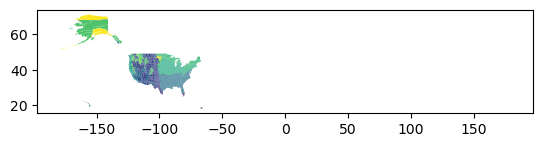

In [34]:
# Read the aggregated climate types file
pq_file = 'data/output/climate_types_raster2polygon/climate_types_county_2015.parquet'
climate_types_df = pq.read_table(pq_file).to_pandas()

# Read the shapefile
shapefile_path = 'data/input/shapefiles/shapefile_county_2015/shapefile.shp'
shapefile = gpd.read_file(shapefile_path)
shapefile.rename(columns={'GEOID': 'county'}, inplace=True)

# Merge the shapefile and df based on a common column
merged_data = shapefile.merge(climate_types_df, on='county')

# Plot the merged data
merged_data.plot(column='climate_type_short', cmap='viridis', legend=False)